In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.optimize as opt



## Funciones

In [2]:


def print_array(array, end = "\n"):
    #np.set_printoptions(precision=3)
    """Funcion para escribir una lista espaceada o salto de linea"""
    for a in array:
        print(" {0:5.4f}".format(a), end = end)
        

def plotData(X, y, xlabel = "Microchips Test 1", ylabel = "Microchips Test 2", 
             label_pos = "y = 1", label_neg = "y = 0"):
    
    """PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix."""
    
    # encontrar los indices positivos y negativos
    pos, neg = np.where(y == 1)[0], np.where(y == 0)[0]
    
    f, ax = plt.subplots(figsize=(8, 8))
    ax.plot(X[pos,0],X[pos,1], "k+", markersize = 8, label = label_pos)
    ax.plot(X[neg,0],X[neg,1], "yo", markersize = 8, label = label_neg)
    

        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.legend()
    plt.show()
    return (f, ax)

def plotDecisionBoundary(theta, X, y, n):    
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta PLOTDECISIONBOUNDARY(theta, X,y) 
    plots the data points with + for the positive examples and o for the negative 
    examples. X is assumed to be a either 
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    #graficar datos
    #plotData(X[:,[1,2]], y)
    
    #m, n = X.shape
    
    if n <= 3:
        # solamente se necesitan dos puntos para definir una linea, por eso escogemos los puntos finales
        plot_x = np.array([X[:,1].min() - 2, X[:,1].max() + 2 ])
        
        # calcular la linea de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        plotData(plot_x, plot_y)
    else:
        #establecer la grilla de rango
        u = np.linspace(-1., 1.5, 50)
        v = np.linspace(-1., 1.5, 50)         
       
        z = np.zeros((len(u), len(v)))
        #evaluar z = theta*x sobre la grilla
        for i in range(0,len(u)):        
            for j in range(0,len(v)):            
                a = u[i].reshape(1,1)
                b = v[j].reshape(1,1)
                z[i,j] = mapFeature(a,b)@theta        
        
        # encontrar los indices positivos y negativos
        pos, neg = np.where(y == 1)[0], np.where(y == 0)[0]
    
        f, ax = plt.subplots(figsize=(8, 8))
        ax.plot(X[pos,0],X[pos,1], "k+", markersize = 8, label = "y = 1")
        ax.plot(X[neg,0],X[neg,1], "yo", markersize = 8, label ="y = 0")    

        
        ax.set_xlabel("Microchips Test 1")
        ax.set_ylabel("Microchips Test 2")
    
        ax.legend()
        
        plt.contour(u, v, z.T, 0)
        
        plt.show()

def mapFeature(X1, X2, degree = 6):
    
    """
    MAPFEATURE Feature mapping function to polynomial features

    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    """
    
    out = np.ones((X1.shape[0], 1)) 
    
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            
            val_pol = ((X1**(i-j))*(X2**(j)))
            #adicionar una columna con el valor del polinomio al final de la matriz
            out = np.hstack(( out, val_pol ))
    
    return out

def sigmoid(z):
    """SIGMOID Compute sigmoid function
       g = SIGMOID(z) computes the sigmoid of z."""
    #inicializar variables
    g = np.zeros(z.shape)    
    g = 1. / (1 + np.exp(-z))
    
    return g

def costFunctionReg(theta, X, y, lambda_reg):
    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    """
    # inicializar valores utiles
    m  = len(y)
    # inicializar valores a retornar
    J = 0.
    grad = np.zeros(theta.shape)
    
    z = np.dot(X,theta)
    h = sigmoid(z)
    # calcular error
    e = h - y
    
    # J =  (1/m)  * (a - b) + (lambda/2m)* c    
    k =  1./m 
    a = -y@np.log(h)
    b = (1 - y)@np.log(1 - h)
    reg = (0.5 *lambda_reg)/m
    c = theta[1:]@theta[1:]
    
    J =  ( k * ( a - b ) )  + ( reg * c )    
    
    grad[0] = k * ( X[:,0].T @ e )    
    grad[1:] = k * ( X[:,1:].T @ e ) + ( 2*reg )*theta[1:]   
                  
    return (J, grad)  

def J(theta, X, y, lambda_reg):  
    """return J value"""
    return costFunctionReg(theta, X, y, lambda_reg)[0]

def gradient(theta, X, y, lambda_reg): 
    """return gradient"""
    return costFunctionReg(theta, X, y, lambda_reg)[1] 


def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    # número de ejemplos de entrenamiento
    m = X.shape[0]
   
    # vectores de probabilidades
    p = np.zeros((m,1))
    
    # asignar 0 o 1 a las probabilidades
    h = sigmoid(X@theta)  
    h = h.reshape((m,1))
    h[ h >= 0.5 ] = 1.
    h[ h < 0.5 ] = 0.
    
    p = h
    
    return p

## Inicialización

X shape= (118, 2)
y shape= (118,)


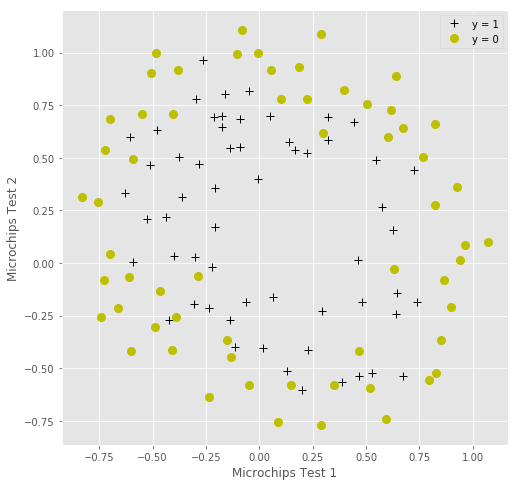

In [9]:
data = np.loadtxt( fname = "ex2data2.txt", delimiter = "," )

# crear matriz de variables y el vector de clases
X = data[:,[0,1]]
X_aux = X.copy()
y = data[:,-1]


print("X shape=",X.shape)
print("y shape=",y.shape) 


m = X.shape[0]
plotData(X, y)
plt.show()



## Parte 1: Regresión Logistica Regularizada

In [4]:
# agregar variables polinomialaes
if X.shape[1] == 2:
    X1 = X[:,0].reshape((X[:,0].shape[0],1))
    X2 = X[:,1].reshape((X[:,1].shape[0],1))
    X = mapFeature( X1, X2 )

# inicializar los parametros de ajuste theta
initial_theta = np.zeros((X.shape[1]))

# establecer parametro de regulacion lambda a 1
lambda_reg = 1

cost, grad = costFunctionReg(initial_theta, X, y, lambda_reg)
print("Costo inicial con theta (zeros): {0:5.3f}".format(cost))
print("costo esperado (approx): 0.693\n")

print("Gradientes con theta (zeros) - primeros cinco valores:")
print_array(grad[0:5])
print("Gradientes esperados (approx) - primeros cinco valores:")
print(" 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n")

print("\nPara lambda = 10")
test_theta = np.ones((X.shape[1]))
cost, grad = costFunctionReg(test_theta, X, y, 10)
print("Costo inicial con theta (zeros): {0:5.3f}".format(cost))
print("costo esperado (approx): 3.16\n")

print("Gradientes con theta (zeros) - primeros cinco valores:")
print_array(grad[0:5])
print("Gradientes esperados (approx) - primeros cinco valores:")
print(" 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n")

Costo inicial con theta (zeros): 0.693
costo esperado (approx): 0.693

Gradientes con theta (zeros) - primeros cinco valores:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Gradientes esperados (approx) - primeros cinco valores:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Para lambda = 10
Costo inicial con theta (zeros): 3.165
costo esperado (approx): 3.16

Gradientes con theta (zeros) - primeros cinco valores:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922
Gradientes esperados (approx) - primeros cinco valores:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



## Part 2: Regularización  y Precisión

X shape= (118, 28)
y shape= (118,)
initial_theta shape= (28,)


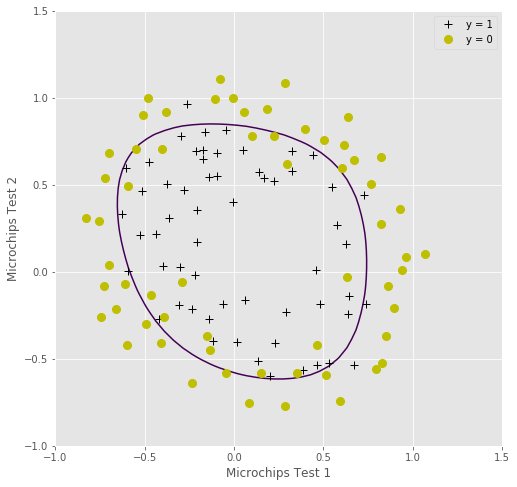

In [5]:
# inicializar los parametros de ajuste theta
initial_theta = np.zeros((X.shape[1]))

# establecer parametro de regulacion lambda a 1
lambda_reg = 1.
print("X shape=",X.shape)
print("y shape=",y.shape) 
print("initial_theta shape=",initial_theta.shape)
val = opt.fmin_bfgs(J, initial_theta, fprime=gradient, args=(X, y, lambda_reg), full_output = True, disp = False)
cost, theta = val[1], val[0]

plotDecisionBoundary(theta, X_aux, y, X.shape[1])

In [6]:
# Compute accuracy on our training set
p = predict(theta, X)

y_aux = y.reshape((m,1))
print("Presición del enetrenamiento: {0:5.6f}\n".format( np.mean((p == y_aux)) * 100))
print("Precisión esperada (con lambda = 1): 83.1(aprox)\n")
#print('\n');

Presición del enetrenamiento: 83.050847

Precisión esperada (con lambda = 1): 83.1(aprox)

